### Modeling and visualizing dynamics of COVID cases in Maryland counties
#### Anna Konstorum (konstorum.anna@gmail.com)
Last updated: 03-26-20

In [1]:
# import packages
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import datetime
%matplotlib inline

In [2]:
# import latest MD county counts
url='https://raw.githubusercontent.com/akonstodata/md_county_covid/master/data/MD_county_covid.csv'
md_county=pd.read_csv(url,sep=',',header='infer', parse_dates=[1],index_col=0)

In [3]:
# create exponential function to model 
# will add additional functions shortly

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

In [4]:
# get current date range
num_dates = md_county.shape[0]
first_date = md_county.iloc[0]["Date"].strftime('%m-%d-%y')
last_date = md_county.iloc[num_dates-1]["Date"].strftime('%m-%d-%y')
date_range=pd.date_range(start=first_date,end=last_date)

# output date range as list
dates = [date.strftime('%m/%d') for date in date_range]

In [5]:
# exponential fit for select counties
counties_to_model=['Montgomery','Anne Arundel',"Prince Georges","Howard",'Baltimore City','Baltimore County','Total']
exp_results=pd.DataFrame(index=counties_to_model,columns=['a','b','c'])
for county in counties_to_model:
    xdata=np.array(md_county.index)
    ydata=np.array(md_county[county])
    popt, pcov = curve_fit(exp_func,xdata,ydata)
    exp_results.loc[county]=popt

In [6]:
# Include all dates, even those with missing data
xdata_full=np.array(range(len(dates)))

### Maryland model and dynamics

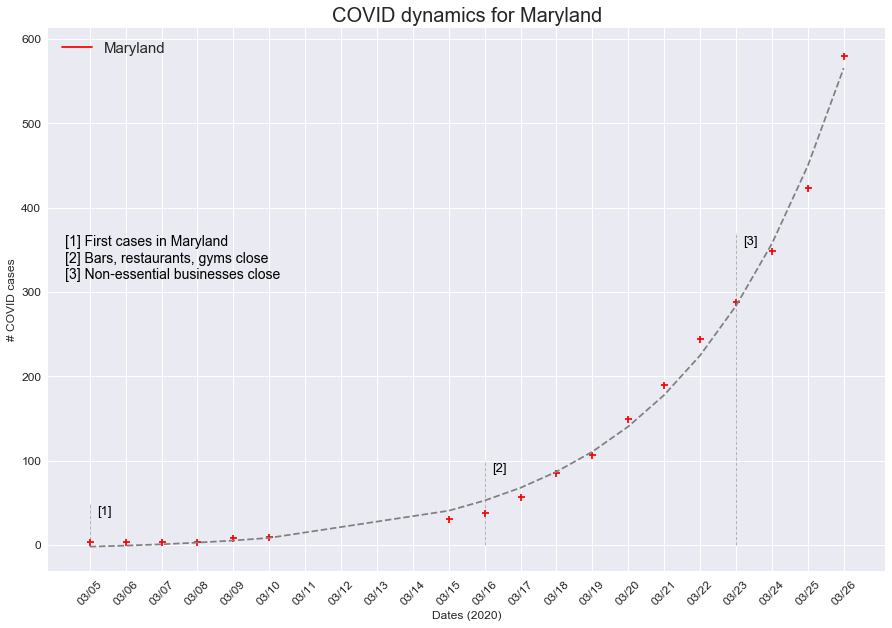

In [7]:
legend_elements =  [Line2D([0], [0], marker='+', color='red', label='Maryland', markersize=15)]

xdata_state=np.array(md_county.index)
ydata_state=np.array(md_county["Total"])
popt_state = exp_results.loc["Total"]

plt.figure(figsize=(15,10))

plt.plot(xdata_state, exp_func(xdata_state, *popt_state), color='grey',linestyle='--');
plt.scatter(md_county.index,md_county['Total'],color='red',marker='+');

plt.vlines(x=0, ymin=0, ymax=50,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(0.4,40,"[1]",rotation=0,color='black',fontsize = 13,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=11, ymin=0, ymax=100,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(11.4,90,"[2]",rotation=0,color='black',fontsize = 13,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=18, ymin=0, ymax=370,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(18.4,360,"[3]",rotation=0,color='black',fontsize = 13,verticalalignment='center',horizontalalignment='center');


plt.text(-0.7,360,"[1] First cases in Maryland",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,340,"[2] Bars, restaurants, gyms close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,320,"[3] Non-essential businesses close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');

plt.ylabel('# COVID cases',fontsize=12);
plt.xticks(xdata_full, dates, rotation=45,fontsize=12)  
plt.yticks(fontsize=12)
plt.xlabel('Dates (2020)',fontsize=12)
plt.legend(handles=legend_elements,fontsize=15,loc='upper left')
plt.title("COVID dynamics for Maryland",fontsize=20);
   

In [8]:
# Predict next day's cases
next_day = len(xdata_full)
next_day_cases = exp_func(next_day, popt_state[0], popt_state[1], popt_state[2])
last_date_str = datetime.datetime.strptime(last_date, "%m-%d-%y")
next_date = (last_date_str + datetime.timedelta(days=1)).strftime("%m/%d")
print("Prediction for number of total cases for",next_date,"is",int(next_day_cases))

Prediction for number of total cases for 03/27 is 710


### Dynamics for three counties: Montgomery, Prince George's and Anne Arundel

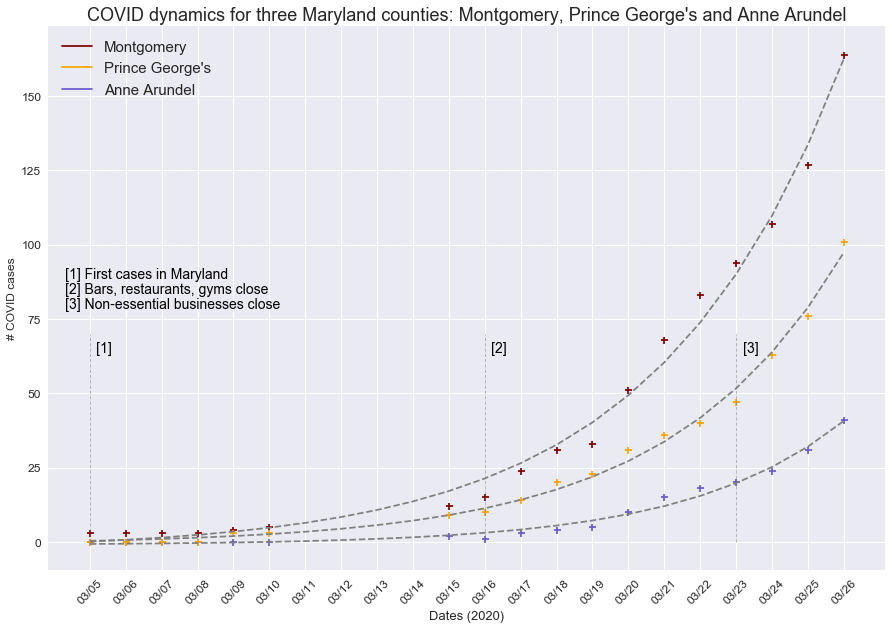

In [9]:
# Create legend
legend_elements =  [Line2D([0], [0], marker='+', color='maroon', label='Montgomery', markersize=15),
                    Line2D([0], [0], marker='+', color='orange', label="Prince George's", markersize=15),
                    Line2D([0], [0], marker='+', color='slateblue', label='Anne Arundel', markersize=15)]

poptM = exp_results.loc["Montgomery"]
poptAA = exp_results.loc["Anne Arundel"]
poptP = exp_results.loc["Prince Georges"]

plt.figure(figsize=(15,10));

# Plot data + model
# model
plt.plot(xdata_full, exp_func(xdata_full, *poptAA), color='grey',linestyle='--')
# data
plt.scatter(md_county.index,md_county['Anne Arundel'],color='slateblue',marker='+')

plt.plot(xdata_full, exp_func(xdata_full, *poptM), color='grey',linestyle='--')
plt.scatter(md_county.index,md_county['Montgomery'],color='maroon',marker='+')

plt.plot(xdata_full, exp_func(xdata_full, *poptP), color='grey',linestyle='--')
plt.scatter(md_county.index,md_county['Prince Georges'],color='orange',marker='+')

# extra info
plt.vlines(x=0, ymin=0, ymax=70,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(0.4,65,"[1]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=11, ymin=0, ymax=70,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(11.4,65,"[2]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=18, ymin=0, ymax=70,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(18.4,65,"[3]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.text(-0.7,90,"[1] First cases in Maryland",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,85,"[2] Bars, restaurants, gyms close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,80,"[3] Non-essential businesses close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');


plt.ylabel('# COVID cases',fontsize=12);
plt.xticks(xdata_full, dates, rotation=45,fontsize=12)  
plt.yticks(fontsize=12)
plt.xlabel('Dates (2020)',fontsize=13)
plt.legend(handles=legend_elements,fontsize=15,loc='upper left')
plt.title("COVID dynamics for three Maryland counties: Montgomery, Prince George's and Anne Arundel",fontsize=18);   

In [10]:
# Predict next day's cases
next_day = len(xdata_full)
next_day_casesM = exp_func(next_day, poptM[0], poptM[1], poptM[2])
print("Prediction for number of cases for Montgomery county for",next_date,"is",int(next_day_casesM))

next_day = len(xdata_full)
next_day_casesP = exp_func(next_day, poptP[0], poptP[1], poptP[2])
print("Prediction for number of cases for Prince George's county for",next_date, "is",int(next_day_casesP))

next_day = len(xdata_full)
next_day_casesAA = exp_func(next_day, poptAA[0], poptAA[1], poptAA[2])
print("Prediction for number of cases for Anne Arundel county for",next_date, "is",int(next_day_casesAA))

Prediction for number of cases for Montgomery county for 03/27 is 197
Prediction for number of cases for Prince George's county for 03/27 is 120
Prediction for number of cases for Anne Arundel county for 03/27 is 51


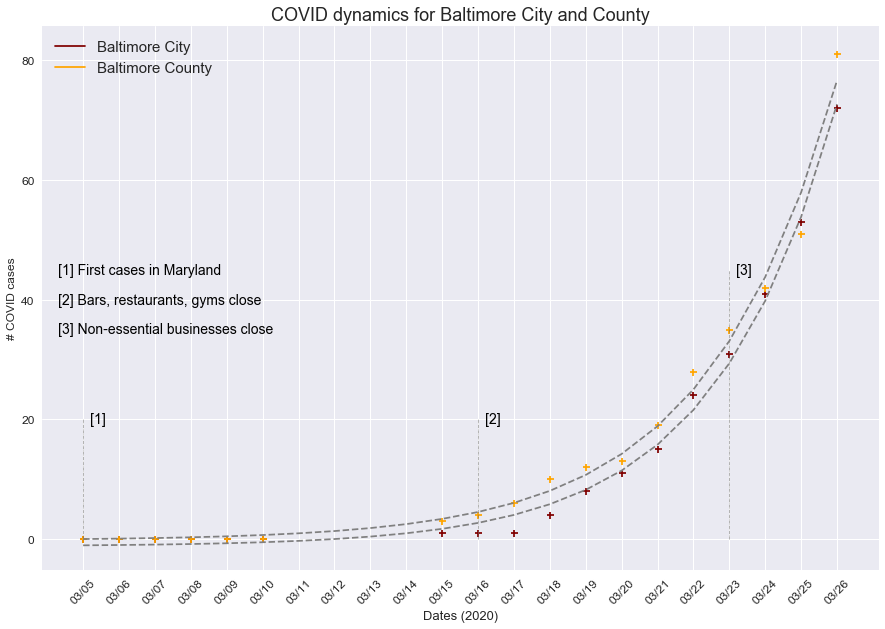

In [11]:
# BALTIMORE
# Create legend
legend_elements =  [Line2D([0], [0], marker='+', color='maroon', label='Baltimore City', markersize=15),
                    Line2D([0], [0], marker='+', color='orange', label="Baltimore County", markersize=15)]

poptB1 = exp_results.loc["Baltimore City"]
poptB2 = exp_results.loc["Baltimore County"]

plt.figure(figsize=(15,10));

# Plot data + model
# model

plt.plot(xdata_full, exp_func(xdata_full, *poptB1), color='grey',linestyle='--')
# data
plt.scatter(md_county.index,md_county['Baltimore City'],color='maroon',marker='+')

plt.plot(xdata_full, exp_func(xdata_full, *poptB2), color='grey',linestyle='--')
plt.scatter(md_county.index,md_county['Baltimore County'],color='orange',marker='+')

# extra info
plt.vlines(x=0, ymin=0, ymax=20,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(0.4,20,"[1]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=11, ymin=0, ymax=20,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(11.4,20,"[2]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.vlines(x=18, ymin=0, ymax=45,color='dimgrey', linewidth=0.5,linestyle='-.');
plt.text(18.4,45,"[3]",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='center');

plt.text(-0.7,45,"[1] First cases in Maryland",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,40,"[2] Bars, restaurants, gyms close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');
plt.text(-0.7,35,"[3] Non-essential businesses close",rotation=0,color='black',fontsize = 14,verticalalignment='center',horizontalalignment='left');

plt.ylabel('# COVID cases',fontsize=12);
plt.xticks(xdata_full, dates, rotation=45,fontsize=12)  
plt.yticks(fontsize=12)
plt.xlabel('Dates (2020)',fontsize=13)
plt.legend(handles=legend_elements,fontsize=15,loc='upper left')
plt.title("COVID dynamics for Baltimore City and County",fontsize=18)   ; 


In [12]:
# Predict next day's cases

next_day = len(xdata_full)
next_day_casesB1 = exp_func(next_day, poptB1[0], poptB1[1], poptB1[2])
print("Prediction for number of cases for Baltimore City for",next_date,"is",int(next_day_casesB1))

next_day = len(xdata_full)
next_day_casesB2 = exp_func(next_day, poptB2[0], poptB2[1], poptB2[2])
print("Prediction for number of cases for Baltimore County for",next_date,"is",int(next_day_casesB2))

Prediction for number of cases for Baltimore City for 03/27 is 97
Prediction for number of cases for Baltimore County for 03/27 is 101
